In [136]:
import pandas as pd
import codecs
import sys
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.cluster import KMeans
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [137]:
yd1 = pd.ExcelFile("./A题部分数据/附件1/YD1.xlsx")
yd2 = pd.ExcelFile("A题部分数据/附件1/YD2.xlsx")
yd3 = pd.ExcelFile("A题部分数据/附件1/YD3.xlsx")
yd4 = pd.ExcelFile("A题部分数据/附件1/YD4.xlsx")
yd5 = pd.ExcelFile("A题部分数据/附件1/YD5.xlsx")
yd6 = pd.ExcelFile("A题部分数据/附件1/YD6.xlsx")
yd7 = pd.ExcelFile("A题部分数据/附件1/YD7.xlsx")
yd8 = pd.ExcelFile("A题部分数据/附件1/YD8.xlsx")
yd9 = pd.ExcelFile("A题部分数据/附件1/YD9.xlsx")
yd10 = pd.ExcelFile("A题部分数据/附件1/YD10.xlsx")
yd11 = pd.ExcelFile("A题部分数据/附件1/YD11.xlsx")

In [138]:
combo1 = pd.ExcelFile("A题部分数据/附件3/设备组1-YD3+YD7.xlsx")
combo2 = pd.ExcelFile("A题部分数据/附件3/设备组2-YD1+YD2+YD4.xlsx")
combo3 = pd.ExcelFile("A题部分数据/附件3/设备组3-YD4+YD5+YD8+YD10+YD11.xlsx")

In [139]:
yd=[yd1,yd2,yd3,yd4,yd5,yd6,yd7,yd8,yd9,yd10, yd11, combo1, combo2, combo3]

In [140]:
equip_data = []
period_data = []
harmonic_data = []
for i in xrange(0,14):
    equip_data.append(yd[i].parse(u'设备数据'));
    period_data.append(yd[i].parse(u'周波数据'));
    harmonic_data.append(yd[i].parse(u'谐波数据'));

In [141]:
period_data[0].head()

,time,IC001,IC002,IC003,IC004,IC005,IC006,IC007,IC008,IC009,...,UC119,UC120,UC121,UC122,UC123,UC124,UC125,UC126,UC127,UC128
0,2018-01-25 14:55:44,1666579,133,149,111,64,34,1666650,1666624,1666550,...,1622152,1618527,1613924,1603431,1600470,1593617,1591364,1582627,1580816,1576276
1,NaT,-86,133,149,111,64,34,-15,-41,-115,...,-44513,-48138,-52741,-63234,-66195,-73048,-75301,-84038,-85849,-90389
2,2018-01-25 14:55:45,1666639,81,1666561,1666557,1666459,1666548,1666638,1666550,1666480,...,45832,40594,34290,21024,15188,10817,1403,1658520,1655265,1644926
3,2018-01-25 14:55:46,1666584,1666520,1666625,19,53,1666521,1666535,1666641,1666525,...,116243,115530,108853,102511,102151,95334,95012,87565,85110,76512
4,2018-01-25 14:55:47,124,152,84,24,109,27,1666481,1666598,106,...,137244,138031,139219,139184,139536,139506,139511,139590,138140,134726


In [17]:
colnames=list(equip_data[0])
colnames

[u'time', u'IC', u'UC', u'PC', u'QC', u'PFC', u'P', u'Q', u'PF']

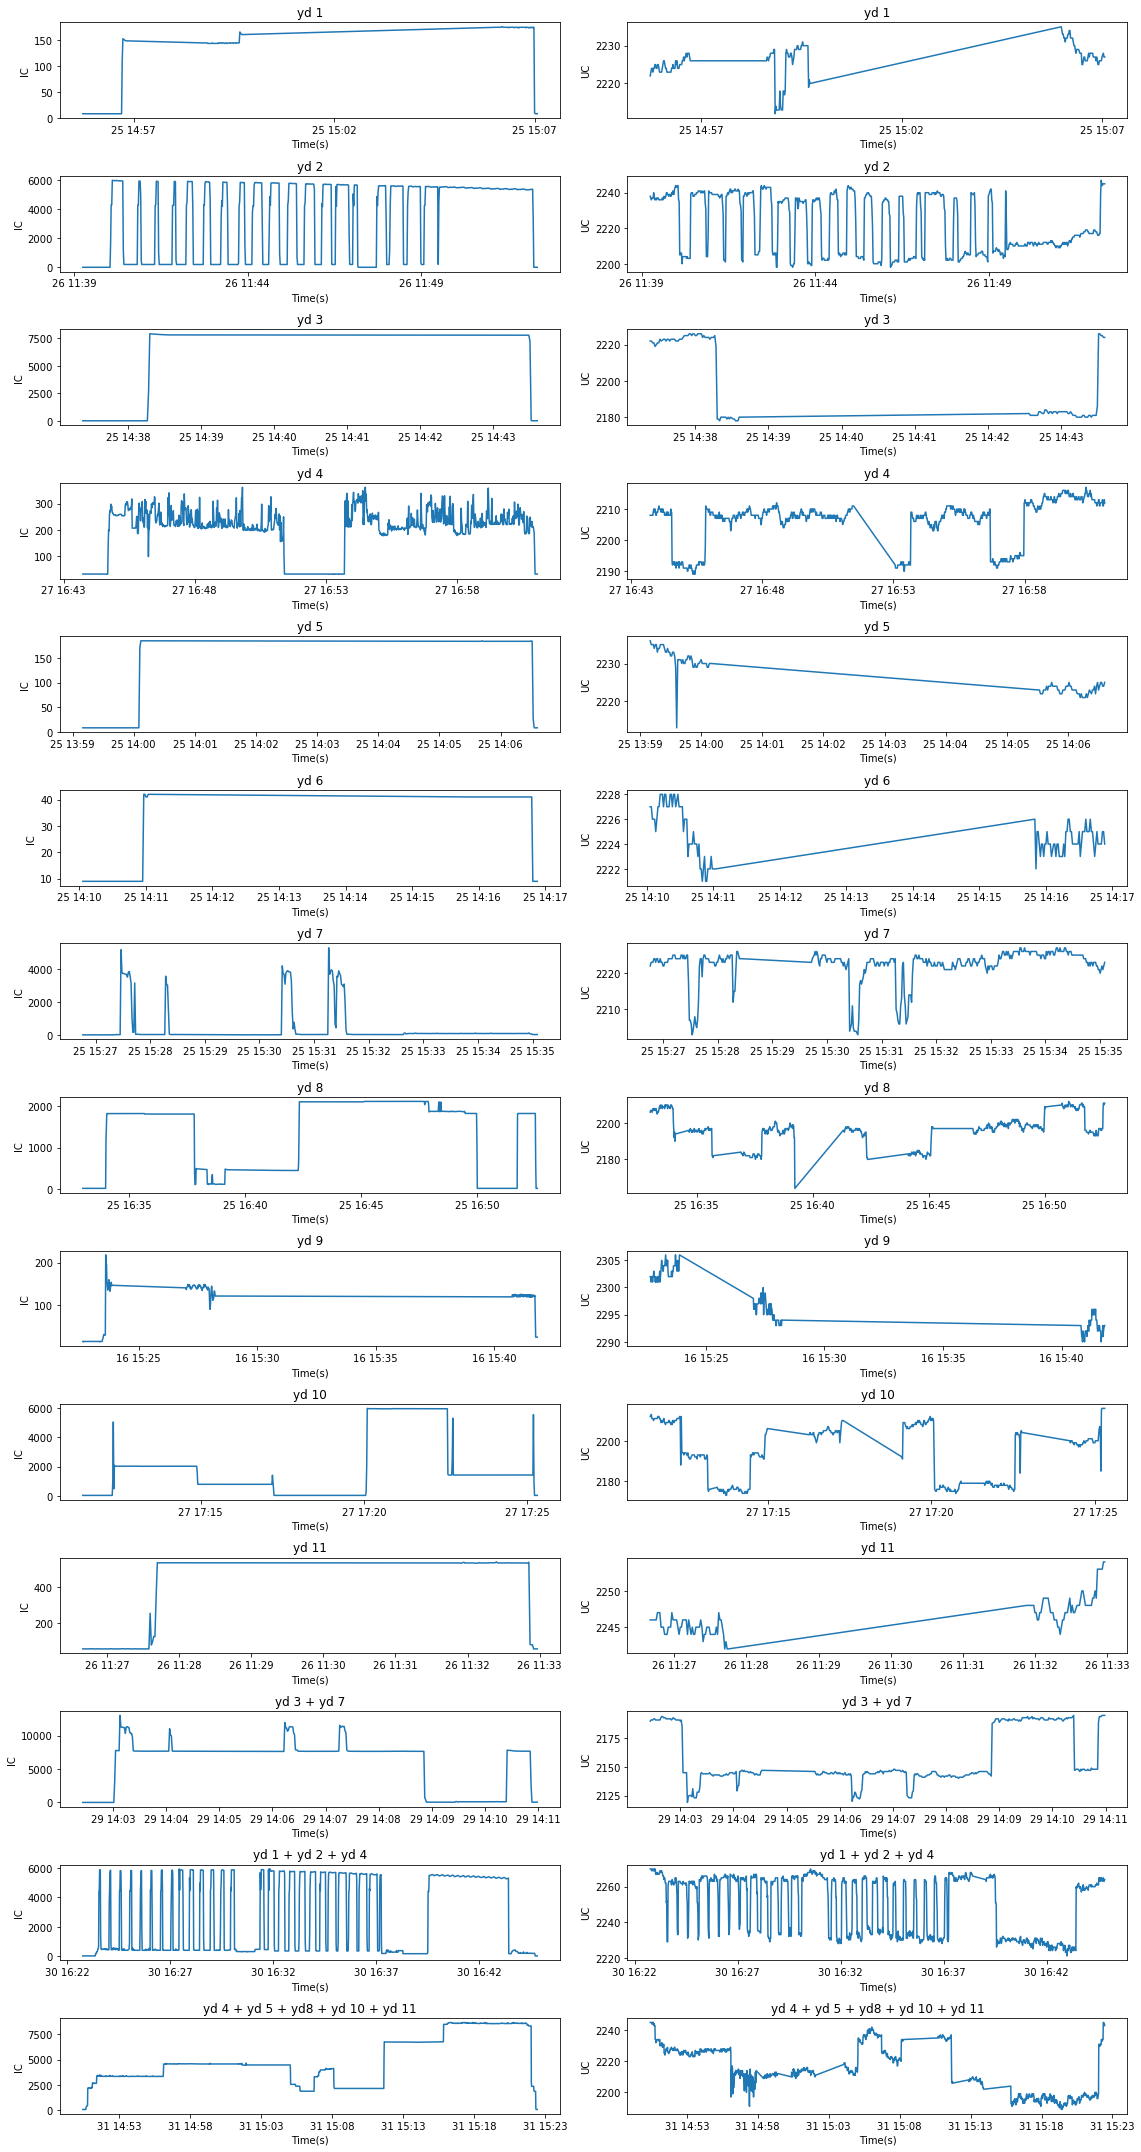

In [142]:
##各个设备的IC 与 UC 随着时间变化。

name = ['IC', 'UC']
fig = plt.figure(figsize=(16, 30))

num=1

for i in range(0,len(equip_data)):
    for c in name:
        ax = fig.add_subplot(len(equip_data),len(name),num)
        num = num+1
        ax.plot(equip_data[i]['time'],equip_data[i][c])
        plt.ylabel(c)
        plt.xlabel('Time(s)')
        if i==11:
            plt.title('yd 3 + yd 7')
        elif i==12:
            plt.title('yd 1 + yd 2 + yd 4')
        elif i==13:
            plt.title('yd 4 + yd 5 + yd8 + yd 10 + yd 11')
        else:   
            plt.title('yd %d' %(i+1))
        

plt.tight_layout()
plt.show()

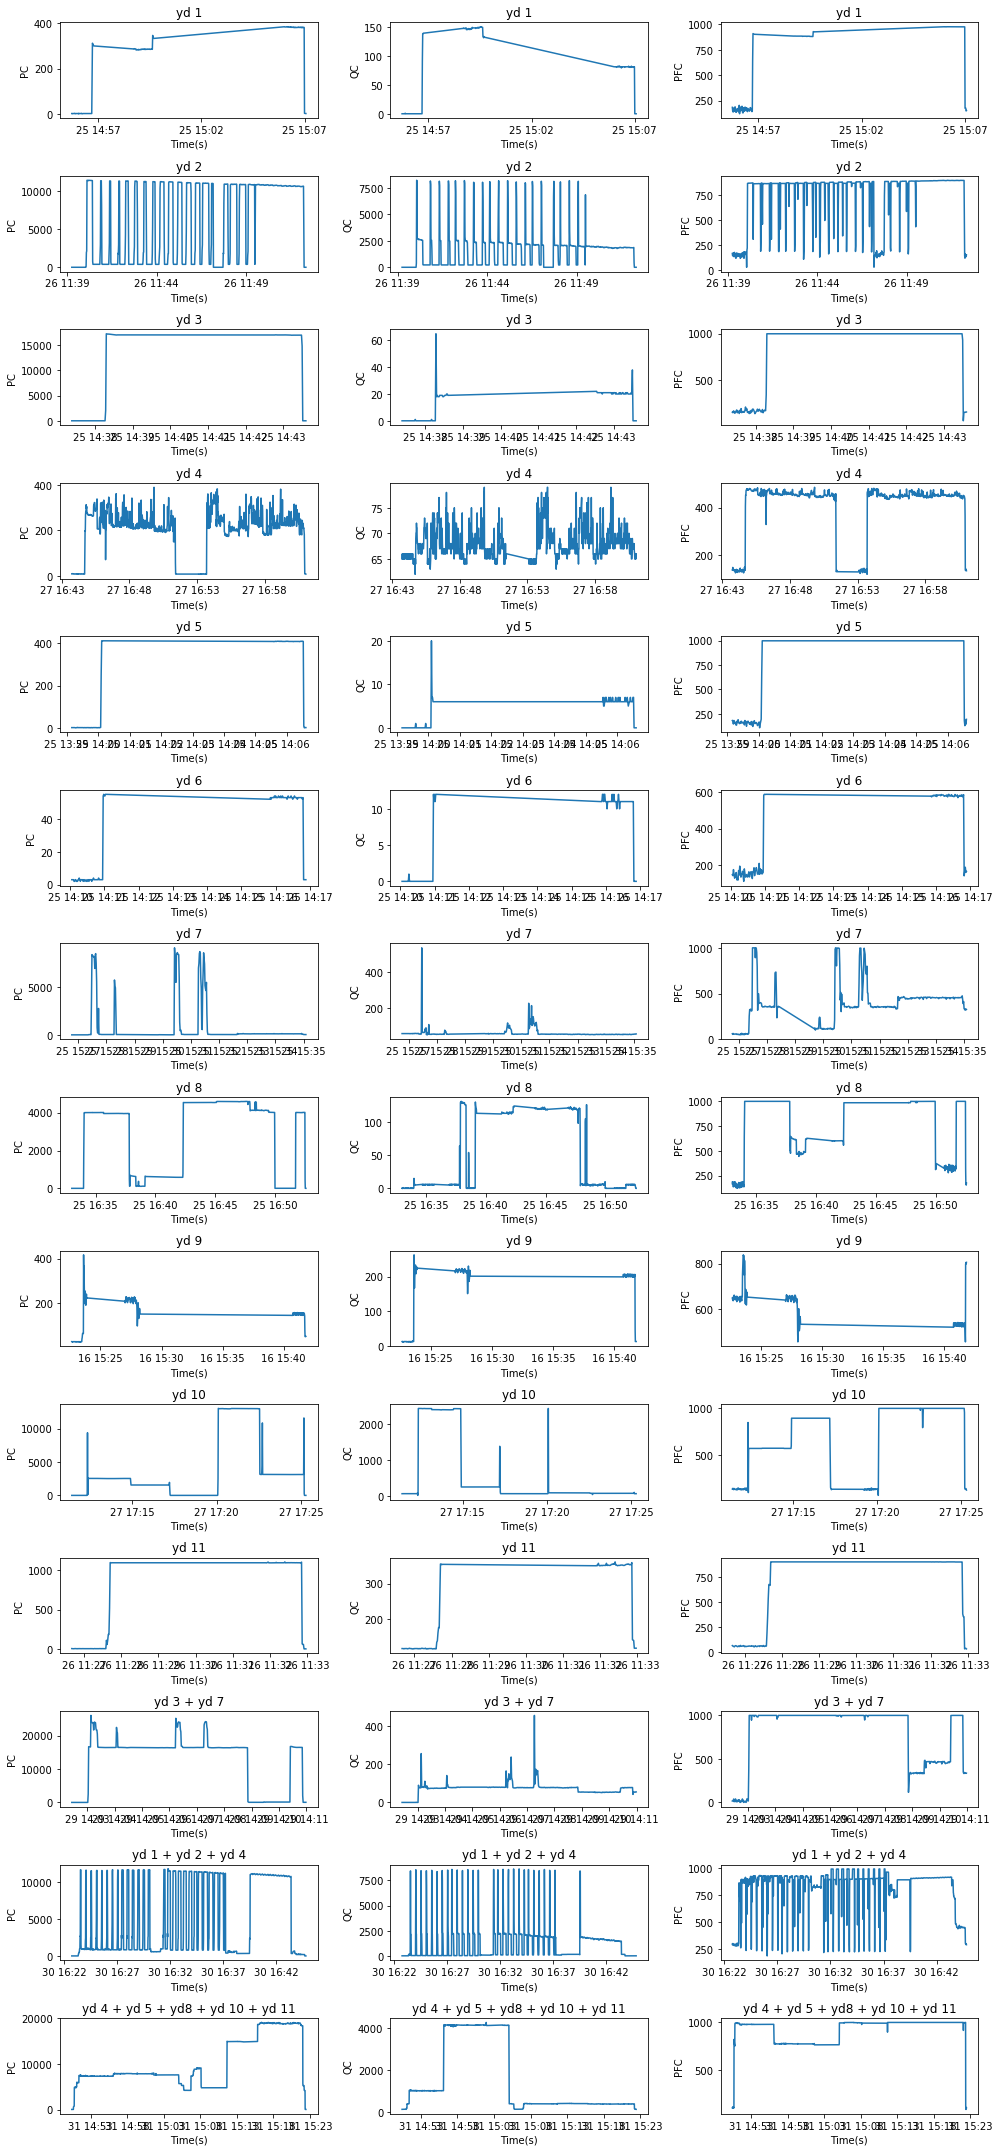

In [143]:
## 各个设备的PC， QC 和 PFC 随时间变化

name = ['PC', 'QC', 'PFC']
fig = plt.figure(figsize=(14, 30))

num=1

for i in range(0,len(equip_data)):
    for c in name:
        ax = fig.add_subplot(len(equip_data),len(name),num)
        num = num+1
        ax.plot(equip_data[i]['time'],equip_data[i][c])
        plt.ylabel(c)
        plt.xlabel('Time(s)')
        if i==11:
            plt.title('yd 3 + yd 7')
        elif i==12:
            plt.title('yd 1 + yd 2 + yd 4')
        elif i==13:
            plt.title('yd 4 + yd 5 + yd8 + yd 10 + yd 11')
        else:   
            plt.title('yd %d' %(i+1))

plt.tight_layout()
plt.show()

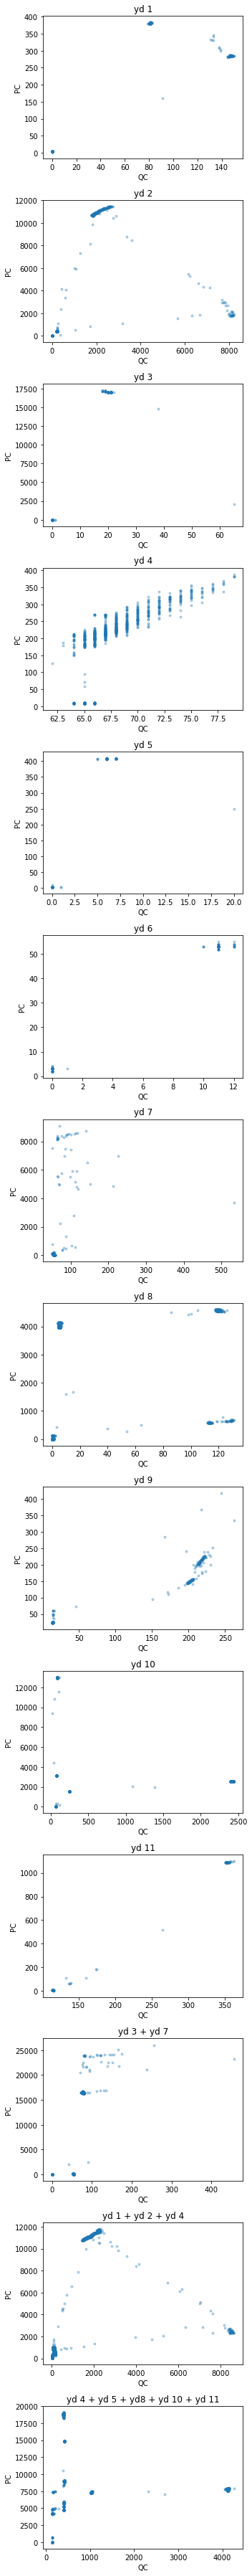

In [144]:
## 各个设备的PC-QC plot

fig = plt.figure(figsize=(5, 50))

num=1

for i in range(0,len(equip_data)):
        ax = fig.add_subplot(len(equip_data),1,num)
        num = num+1
        ax.plot(equip_data[i]['QC'],equip_data[i]['PC'],'.', alpha=0.3)
        plt.ylabel('PC')
        plt.xlabel('QC')
        if i==11:
            plt.title('yd 3 + yd 7')
        elif i==12:
            plt.title('yd 1 + yd 2 + yd 4')
        elif i==13:
            plt.title('yd 4 + yd 5 + yd8 + yd 10 + yd 11')
        else:   
            plt.title('yd %d' %(i+1))

plt.tight_layout()
plt.show()

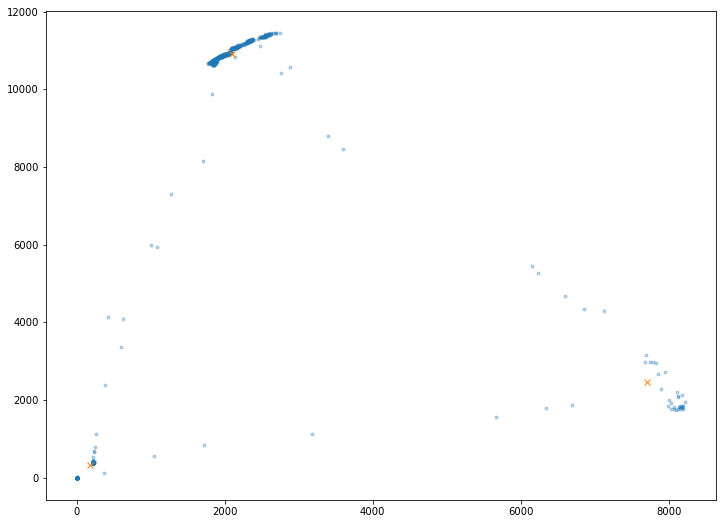

[[ 2093.73170732 10915.10243902]
 [  182.58035714   335.80952381]
 [ 7701.15789474  2456.73684211]]


In [238]:
X = 1
nCluster = 3

pq = np.array([equip_data[X]['QC'],equip_data[X]['PC']])
pq2 = np.stack(pq,axis=1)
kmeans = KMeans(n_clusters=nCluster).fit(pq2)

plt.figure(figsize=(12, 9))
plt.plot(equip_data[X]['QC'],equip_data[X]['PC'],'.', alpha=0.3)
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'x')
plt.show()

print kmeans.cluster_centers_

In [386]:
#将PC-QC plot中的散点cluster，并估计各个cluster的中心

pq=[['YD1', 3,[2.97, 0.01], [381.03, 80.92], [287.56, 145.03]], 
    ['YD2', 3, [NaN,NaN], [335.80, 182.58], [10915.10, 2093.73], [2456.73, 7701.15]],
    ['YD3', 2, [37.25, 1.11], [17016.00, 20.42]],
    ['YD4', 10, [65.12, 9.48], [71.19,287.58], [66.03,204.42], [69.04,264.91], [76.15,348.92],
    [65.22,179.94], [68.66,242.16], [73.29,315.88], [64.25, 87.75], [67.35,222.34]],
    ['YD5', 2, [3.00, 0.03], [404.92, 6.42]],
    ['YD6', 2, [2.84, 0.01], [53.14, 11.11]],
    ['YD7', 3, [nan,nan], [77.55, 55.60], [8190.64, 89.8], [5096.43, 135.37]],
    ['YD8', 4, [35.40, 0.55], [4560.62, 119.34], [4033.48, 5.51], [626.62, 114.01]],
    ['YD9', 3, [29.79, 14.17], [149.25, 201.94], [221.01, 217.63]],
    ['YD10', 5, [16.90, 66.21], [12915.77, 87.18], [2534.42, 2419.45], [3150.79, 74.92], [1572.81, 282.36]],
    ['YD11', 2, [nan,nan], [26.69, 121.34], [1089.45, 353.55]]
   ]

df = pd.DataFrame(data=pq)
df.columns = ['YD_name', 'nCluster', 'PQ1', 'PQ2', 'PQ3', 'PQ4', 'PQ5', 'PQ6', 'PQ7', 'PQ8', 'PQ9', 'PQ10']
df.fillna(value=nan, inplace=True)
df

,YD_name,nCluster,PQ1,PQ2,PQ3,PQ4,PQ5,PQ6,PQ7,PQ8,PQ9,PQ10
0,YD1,3,"[2.97, 0.01]","[381.03, 80.92]","[287.56, 145.03]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YD2,3,"[nan, nan]","[335.8, 182.58]","[10915.1, 2093.73]","[2456.73, 7701.15]",NaN,NaN,NaN,NaN,NaN,NaN
2,YD3,2,"[37.25, 1.11]","[17016.0, 20.42]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YD4,10,"[65.12, 9.48]","[71.19, 287.58]","[66.03, 204.42]","[69.04, 264.91]","[76.15, 348.92]","[65.22, 179.94]","[68.66, 242.16]","[73.29, 315.88]","[64.25, 87.75]","[67.35, 222.34]"
4,YD5,2,"[3.0, 0.03]","[404.92, 6.42]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,YD6,2,"[2.84, 0.01]","[53.14, 11.11]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,YD7,3,"[nan, nan]","[77.55, 55.6]","[8190.64, 89.8]","[5096.43, 135.37]",NaN,NaN,NaN,NaN,NaN,NaN
7,YD8,4,"[35.4, 0.55]","[4560.62, 119.34]","[4033.48, 5.51]","[626.62, 114.01]",NaN,NaN,NaN,NaN,NaN,NaN
8,YD9,3,"[29.79, 14.17]","[149.25, 201.94]","[221.01, 217.63]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,YD10,5,"[16.9, 66.21]","[12915.77, 87.18]","[2534.42, 2419.45]","[3150.79, 74.92]","[1572.81, 282.36]",NaN,NaN,NaN,NaN,NaN


In [425]:
#Input the validation set (input_id = 0 to 10)
input_id = 10
vSet = np.array([equip_data[input_id]['PC'], equip_data[input_id]['QC']])
vSet2 = np.stack(vSet,axis=1)

vMeans = KMeans(n_clusters=2).fit(vSet2)
cm = vMeans.cluster_centers_
for cm_i in cm:
    print cm_i - df.iloc[5][2]
print 'You chose the validation set: YD'+str(input_id+1)
print 'The max PC or QC value is: '+str(vSet2.max())

[1086.61  353.54]
[ 23.8569697  121.33848485]
You chose the validation set: YD11
The max PC or QC value is: 1100


In [426]:
#Match the validation set with the PQ dataframe
exit_flag = False
for nc in range(1,11):            #Loop over all available nCluster values
    no_match_flag = False
    km = KMeans(n_clusters=nc).fit(vSet2)
    center_meas = km.cluster_centers_
    for ydid in range(0,11):     #Loop over all YD devices
        for center_meas_i in center_meas:     #Loop over all measured KMeans centers for the validation set
            for i in range(2,12):             #Loop over all P-Q pairs for each YD device
                diff = center_meas_i - df.iloc[ydid][i]
                #Ensure there are at least 1 matching besides the zero point
                if i==2:
                    continue
                #Set a threshold to determine the center is matched
                elif np.linalg.norm(diff)<10.0 or np.linalg.norm(diff)<0.05*np.linalg.norm(center_meas_i):             
                    exit_flag = True
                    break
                #Set a no-matching flag if it runs through ALL the combinations of cluster cent
                elif i==11 and ydid==10:
                    no_match_flag = True
                    break
            if exit_flag or no_match_flag:
                break
        if exit_flag or no_match_flag:
            break
    if no_match_flag:
        print str(nc)+' clusters: No matching found!'
    else:
        print str(nc)+' clusters: YD'+str(ydid+1)         
    #'YD1' or 'YD11' tail in the output should be ignored!
    
if exit_flag==False:
    print 'Hmm...I guess you are using... YD4?'

1 clusters: No matching found!
2 clusters: YD11
3 clusters: YD1
4 clusters: YD1
5 clusters: YD1
6 clusters: YD1
7 clusters: YD1
8 clusters: YD1
9 clusters: YD1
10 clusters: YD1
